In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

%config IPCompleter.greedy=True

pd.options.display.max_columns = None

In [2]:
con = sa.create_engine('sqlite:///DatosValencia/airbnbValencia.db')

df = pd.read_sql('df_preparado', con = con)

df.head()

level_0  index      id                                       name  host_id  \
0        0      0   48154              Precioso apartamento con wifi   219476   
1        1      1  136378         Old City Charm with Modern Comfort   591197   
2        2      2  149715  1900 Style Valencian Beach  Home for 10px     5947   
3        3      3  165971                   ★ Architectural touch! ★   791187   
4        4      4  182221         Apartments Calatrava City Valencia  1315567   

  neighbourhood_group        neighbourhood  latitude  longitude  \
0           LA SAIDIA             MORVEDRE  39.48375   -0.37502   
1        CIUTAT VELLA            EL MERCAT  39.47358   -0.37815   
2    POBLATS MARITIMS  CABANYAL-CANYAMELAR  39.46746   -0.32813   
3           EXTRAMURS           LA ROQUETA  39.46790   -0.38206   
4      CAMINS AL GRAU                AIORA  39.46343   -0.34325   

         room_type  price  minimum_nights  calculated_host_listings_count  \
0  Entire home/apt   92.0               3                               4   
1  Entire home/apt   75.0              28                               2   
2  Entire home/apt  269.0               2                               1   
3  Entire home/apt  132.0               5                               7   
4  Entire home/apt  180.0               3                               2   

   availability_365                                        description  \
0                81  Second floor on a farm from the late 19th cent...   
1                 0                                               None   
2               260  Typical town house with 5 bedrooms and 3 and a...   
3                16  Hola! I am ready to welcome you in my apt., wh...   
4               336                                               None   

  host_is_superhost  accommodates  bathrooms  bedrooms  beds  \
0                 f             4        1.0       2.0   2.0   
1                 f             3        1.0       1.0   2.0   
2                 f            10        4.0       5.0   7.0   
3              None             5        1.0       1.0   1.0   
4                 f             5        1.0       2.0   5.0   

   number_of_reviews  review_scores_rating  review_scores_communication  \
0                161                  4.60                         4.78   
1                 25                  4.46                         4.80   
2                259                  4.66                         4.89   
3                517                  4.87                         4.87   
4                  8                  4.50                         4.63   

   review_scores_location  precio_m2          distrito  precio_total  \
0                    4.49       2479         LA SAIDIA          92.0   
1                    4.84       3832      CIUTAT VELLA          75.0   
2                    4.59       2662  POBLATS MARITIMS         269.0   
3                    4.83       3125         EXTRAMURS         132.0   
4                    4.25       2896    CAMINS AL GRAU         180.0   

   ocupacion    bedrooms_disc accommodates_disc beds_disc  \
0         77           02_Dos               3-4       2-3   
1        100           01_Uno               3-4       2-3   
2         28  04_Cuatro_o_mas              5-16      4-31   
3         95           01_Uno              5-16       0-1   
4          7           02_Dos              5-16      4-31   

  number_of_reviews_disc   m2  precio_compra  pdi_arts  
0                   2-37   70       121471.0  3.890754  
1                   2-37   50       134120.0  3.202849  
2                 38-860  160       298144.0  2.390186  
3                    0-1   50       109375.0  3.112647  
4                 38-860   70       141904.0  1.167519

In [3]:
from sqlalchemy import inspect
insp = inspect(con)
tablas = insp.get_table_names()
tablas

['df', 'df_mergeado', 'df_preparado', 'listings', 'listings_det']

### Using the levers

Cosa de precio, como cambia todo según precio y tal. Vamos a intentar encontrar oportunidades en plan precios bajos con posibilidades de poner el alquiler alto

In [4]:
df.precio_total.describe()

count    9002.000000
mean      125.028072
std       136.221188
min        20.000000
25%        65.000000
50%       106.000000
75%       150.000000
max      6286.000000
Name: precio_total, dtype: float64

In [5]:
# the mean is odd, because the std is very high
# this indicates that there must be outliers

In [6]:
df.precio_total.median()


106.0

In [7]:
# 106 rent per night

# either we start working with outliers or we stick with the median
# in this case we are going to do it, given what we know

In [8]:

df.groupby('distrito').precio_total.median().sort_values(ascending = False)




distrito
POBLATS DEL NORD     130.0
LA SAIDIA            123.0
CIUTAT VELLA         120.0
POBLATS MARITIMS     120.0
L'EIXAMPLE           118.5
EXTRAMURS            106.5
CAMINS AL GRAU       104.0
BENIMACLET           101.5
POBLATS DEL SUD      101.0
QUATRE CARRERES       96.0
CAMPANAR              92.0
POBLATS DE L'OEST     91.0
ALGIROS               85.5
EL PLA DEL REAL       85.5
BENICALAP             85.0
PATRAIX               76.5
JESUS                 74.0
RASCANYA              70.0
L'OLIVERETA           54.0
Name: precio_total, dtype: float64

I don't know much about Valencia, so I don't see anything unusual here. I would perhaps have to do some research.

In any case, one can always compare with the average property price or proximity to points of interest.

In [9]:
# let's see prices

temp = df.groupby('distrito')[['precio_total','precio_compra']].median()
temp

precio_total  precio_compra
distrito                                      
ALGIROS                    85.5        97720.0
BENICALAP                  85.0        73920.0
BENIMACLET                101.5       129507.0
CAMINS AL GRAU            104.0       101360.0
CAMPANAR                   92.0       100450.0
CIUTAT VELLA              120.0       134120.0
EL PLA DEL REAL            85.5       123690.0
EXTRAMURS                 106.5       109375.0
JESUS                      74.0        72730.0
L'EIXAMPLE                118.5       143920.0
L'OLIVERETA                54.0        66920.0
LA SAIDIA                 123.0        86765.0
PATRAIX                    76.5        79800.0
POBLATS DE L'OEST          91.0        78351.0
POBLATS DEL NORD          130.0        58240.0
POBLATS DEL SUD           101.0       115150.0
POBLATS MARITIMS          120.0        93170.0
QUATRE CARRERES            96.0        82565.0
RASCANYA                   70.0        64680.0

''

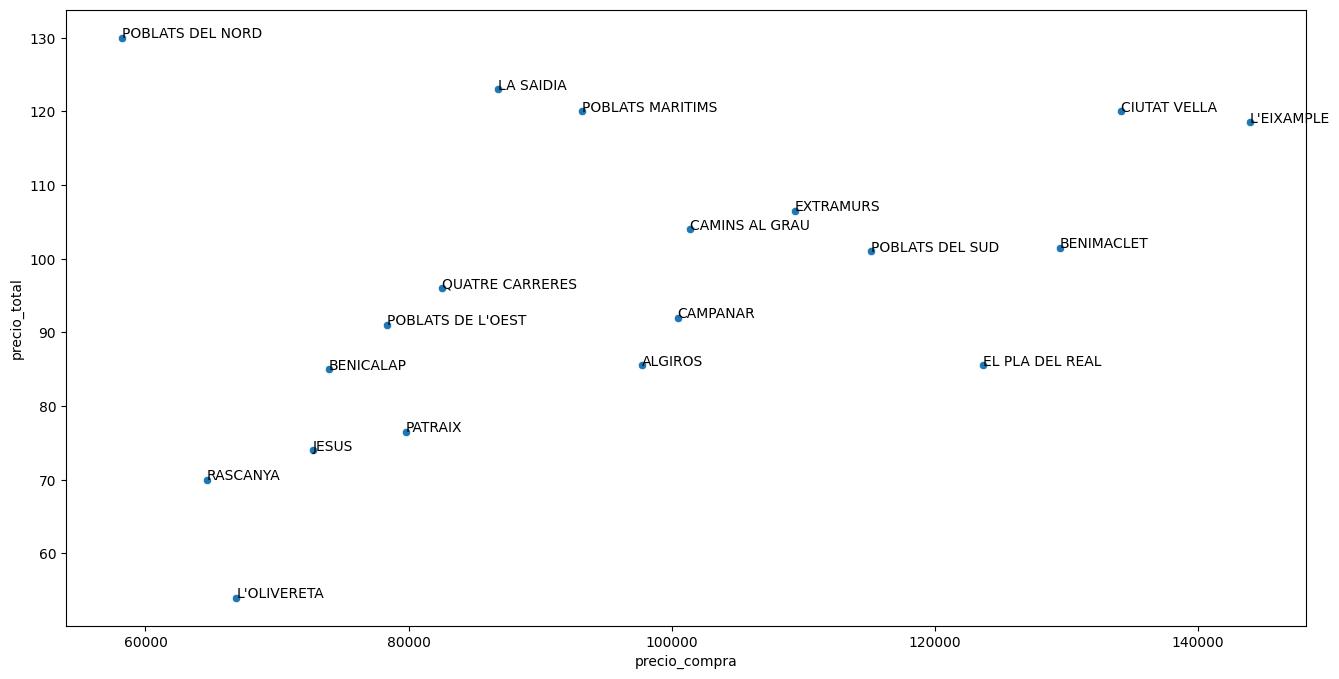

In [10]:
# ok here it is interesting to find places where
# the rental price does not change much but is cheaper

plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x='precio_compra', y = 'precio_total')

# let's put labels on the points to see which is which
# there is some crazy point, the low price buy high price rent is interesting

for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.precio_total.iloc[cada], temp.index[cada])

;



### Taking a look at Poblats del Nord

In [2]:
# What is going on with Poblats del Nord?
# Its purchase price is low but its rent is very high

In [12]:


df.loc[df.distrito == 'POBLATS DEL NORD'].sort_values('precio_total',ascending = False).head(10)



level_0  index                   id  \
7447     7447   7447  1105228691252179974   
1101     1101   1101             22409066   
4915     4915   4915   891348469795051729   
3469     3469   3469   641344261538300181   
6023     6023   6023   996900137094384814   
912       912    912             19223606   
459       459    459             12259478   
7394     7394   7394  1102218537926371946   
2609     2609   2609             50145916   
4638     4638   4638   858709513078888726   

                                                   name    host_id  \
7447             NEW VLC Apart - Cervero 24A, Apart 104  542811646   
1101                                       CASUAL HOUSE  164034271   
4915                      Casa Mediterranea en Valencia    7617037   
3469                        Autocaravana Rustic Escapes  462421478   
6023                                          El Campet   21533558   
912     Charming country house 15 minutes from Valencia    1383826   
459                   Buhardilla Silenciosa y luminosa.   66014145   
7394           Habitación para una sola persona (chica)  351167597   
2609  Alquilo Hab. pequeñ 30e cerca c.c Arena 5km d ...  404667487   
4638                             Habitación para chicas  507805547   

     neighbourhood_group        neighbourhood   latitude  longitude  \
7447    POBLATS DEL NORD            POBLE NOU  39.500483  -0.388734   
1101    POBLATS DEL NORD              CARPESA  39.515850  -0.377860   
4915    POBLATS DEL NORD              CARPESA  39.505024  -0.376241   
3469    POBLATS DEL NORD          MASSARROJOS  39.547770  -0.417710   
6023    POBLATS DEL NORD          MASSARROJOS  39.538846  -0.407293   
912     POBLATS DEL NORD  MAHUELLA-TAULADELLA  39.542854  -0.334211   
459     POBLATS DEL NORD          MASSARROJOS  39.545790  -0.414450   
7394    POBLATS DEL NORD            POBLE NOU  39.499918  -0.371473   
2609    POBLATS DEL NORD            POBLE NOU  39.502070  -0.371350   
4638    POBLATS DEL NORD            POBLE NOU  39.500380  -0.371180   

            room_type  price  minimum_nights  calculated_host_listings_count  \
7447  Entire home/apt  583.0               1                               7   
1101  Entire home/apt  400.0               2                               1   
4915  Entire home/apt  320.0               2                               1   
3469  Entire home/apt  160.0               2                               1   
6023  Entire home/apt  131.0               3                               1   
912   Entire home/apt  130.0               7                               1   
459      Private room   49.0               1                               1   
7394     Private room   40.0               1                               1   
2609     Private room   30.0               1                               1   
4638     Private room   30.0               1                               1   

      availability_365                                        description  \
7447               315          This stylish place is perfect for groups.   
1101               131  Casual House is located in l 'horta de Valenci...   
4915               172  Renovated grocery store in the middle of Valen...   
3469                90  Reconnect with nature with this unforgettable ...   
6023                89  Mediterranean-style wooden house, located a 5-...   
912                232  Recently refurbished home in country location ...   
459                327  If you want to enjoy Tranquility and silence h...   
7394               270  Outdoor, quiet, comfortable and single room is...   
2609               365  small room (30 PER PERSON)  has a sofa bed and...   
4638               365  Room only for girls, bright and quiet and with...   

     host_is_superhost  accommodates  bathrooms  bedrooms  beds  \
7447                 f            10        1.0       1.0   5.0   
1101                 f             9        2.0       3.0   5.0   
4915                 f     

In [13]:
# it seems that there are enough apartments here for many people
# it is possible that this is skewing the result of the purchase price
# it would be necessary to investigate with external data a little

# I want a graph that shows the number of accommodates in these


df.loc[df.distrito == 'POBLATS DEL NORD'].accommodates.describe()



count    11.000000
mean      4.636364
std       3.294624
min       1.000000
25%       2.000000
50%       4.000000
75%       7.500000
max      10.000000
Name: accommodates, dtype: float64

In [14]:
# ok, an average of 5 tenants (the median matches)

print('cantidad de pisos aquí: ',
      len(df.loc[df.distrito == 'POBLATS DEL NORD']))

cantidad de pisos aquí:  11


In [15]:
df.loc[df.distrito == 'POBLATS DEL NORD'].accommodates.value_counts()


accommodates
2     2
4     2
1     2
3     1
7     1
9     1
8     1
10    1
Name: count, dtype: int64

In [16]:
# there are very few apartments, too,
# I don't think you can get much from here

### Back to the graph


''

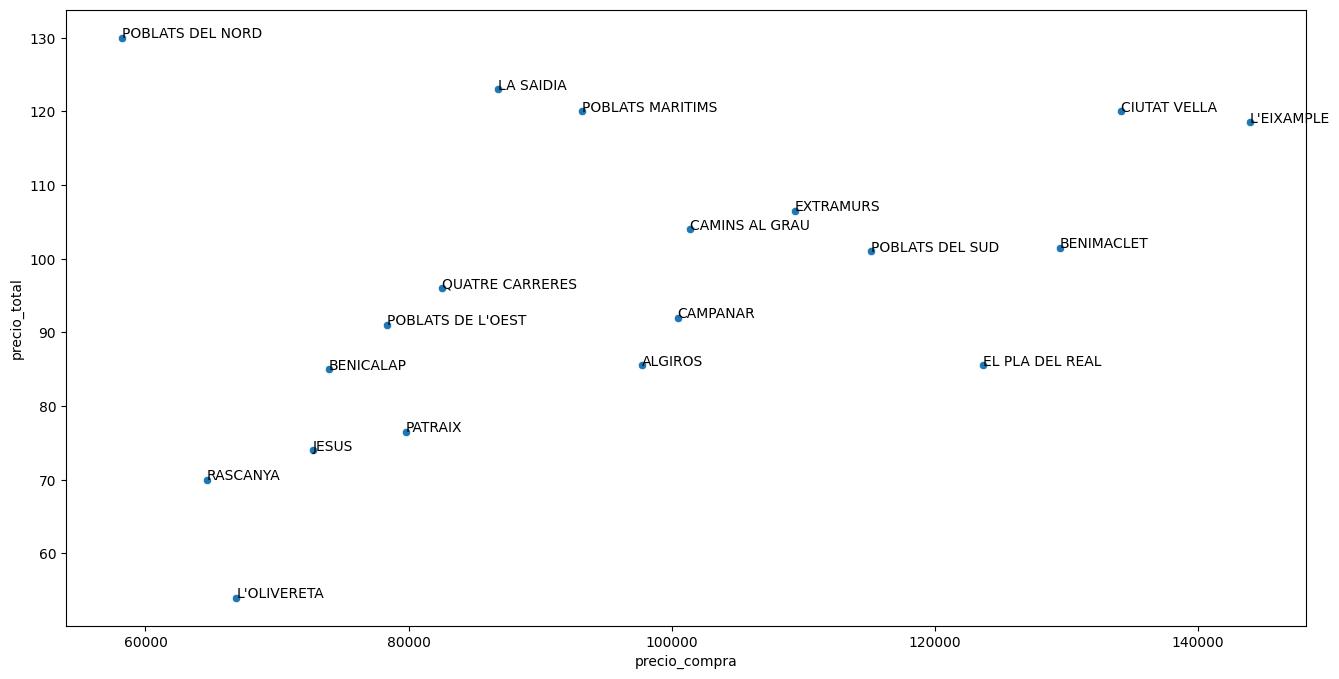

In [17]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x='precio_compra', y = 'precio_total')

# let's put labels on the points to see which is which
# there is some crazy point, the low price buy high price rent is interesting

for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.precio_total.iloc[cada], temp.index[cada])

;



We see that we could identify three blocks: a part on the left where prices and costs are low and are rising; a flatter part (surprisingly, in Madrid it is steeper) that corresponds to a midpoint (and here we would be interested in seeing what happens with La Saidia and Poblats Marítims, which are supposedly not so expensive to buy and have sky-high prices); and a third, already super-high fragment of Ciutat Vella and L'Eixamlpe, which are already urban areas.

### Analyzing by neighborhood

In [18]:
tempBarrio = df.groupby('neighbourhood')[['precio_total','precio_compra']].median()
tempBarrio.head(20)


precio_total  precio_compra
neighbourhood                                                    
AIORA                                        102.0       101360.0
ALBORS                                        89.5       101360.0
ARRANCAPINS                                   95.2       109375.0
BENICALAP                                     85.5        73920.0
BENIFERRI                                    123.0        78351.0
BENIMACLET                                   103.0       129507.0
BENIMAMET                                     79.5        67158.0
BETERO                                       112.5       130438.0
CABANYAL-CANYAMELAR                          122.0        93170.0
CAMI DE VERA                                  75.0       129507.0
CAMI FONDO                                   106.0       101360.0
CAMI REAL                                     72.0        72730.0
CAMPANAR                                      95.0       100450.0
CARPESA                                      360.0       104832.0
CASTELLAR-L'OLIVERAL                          52.0        82250.0
CIUTAT DE LES ARTS I DE LES CIENCIES         120.0        82565.0
CIUTAT FALLERA                                75.0        73920.0
CIUTAT JARDI                                  99.5        97720.0
CIUTAT UNIVERSITARIA                          97.5       123690.0
EL BOTANIC                                   114.0       109375.0

''

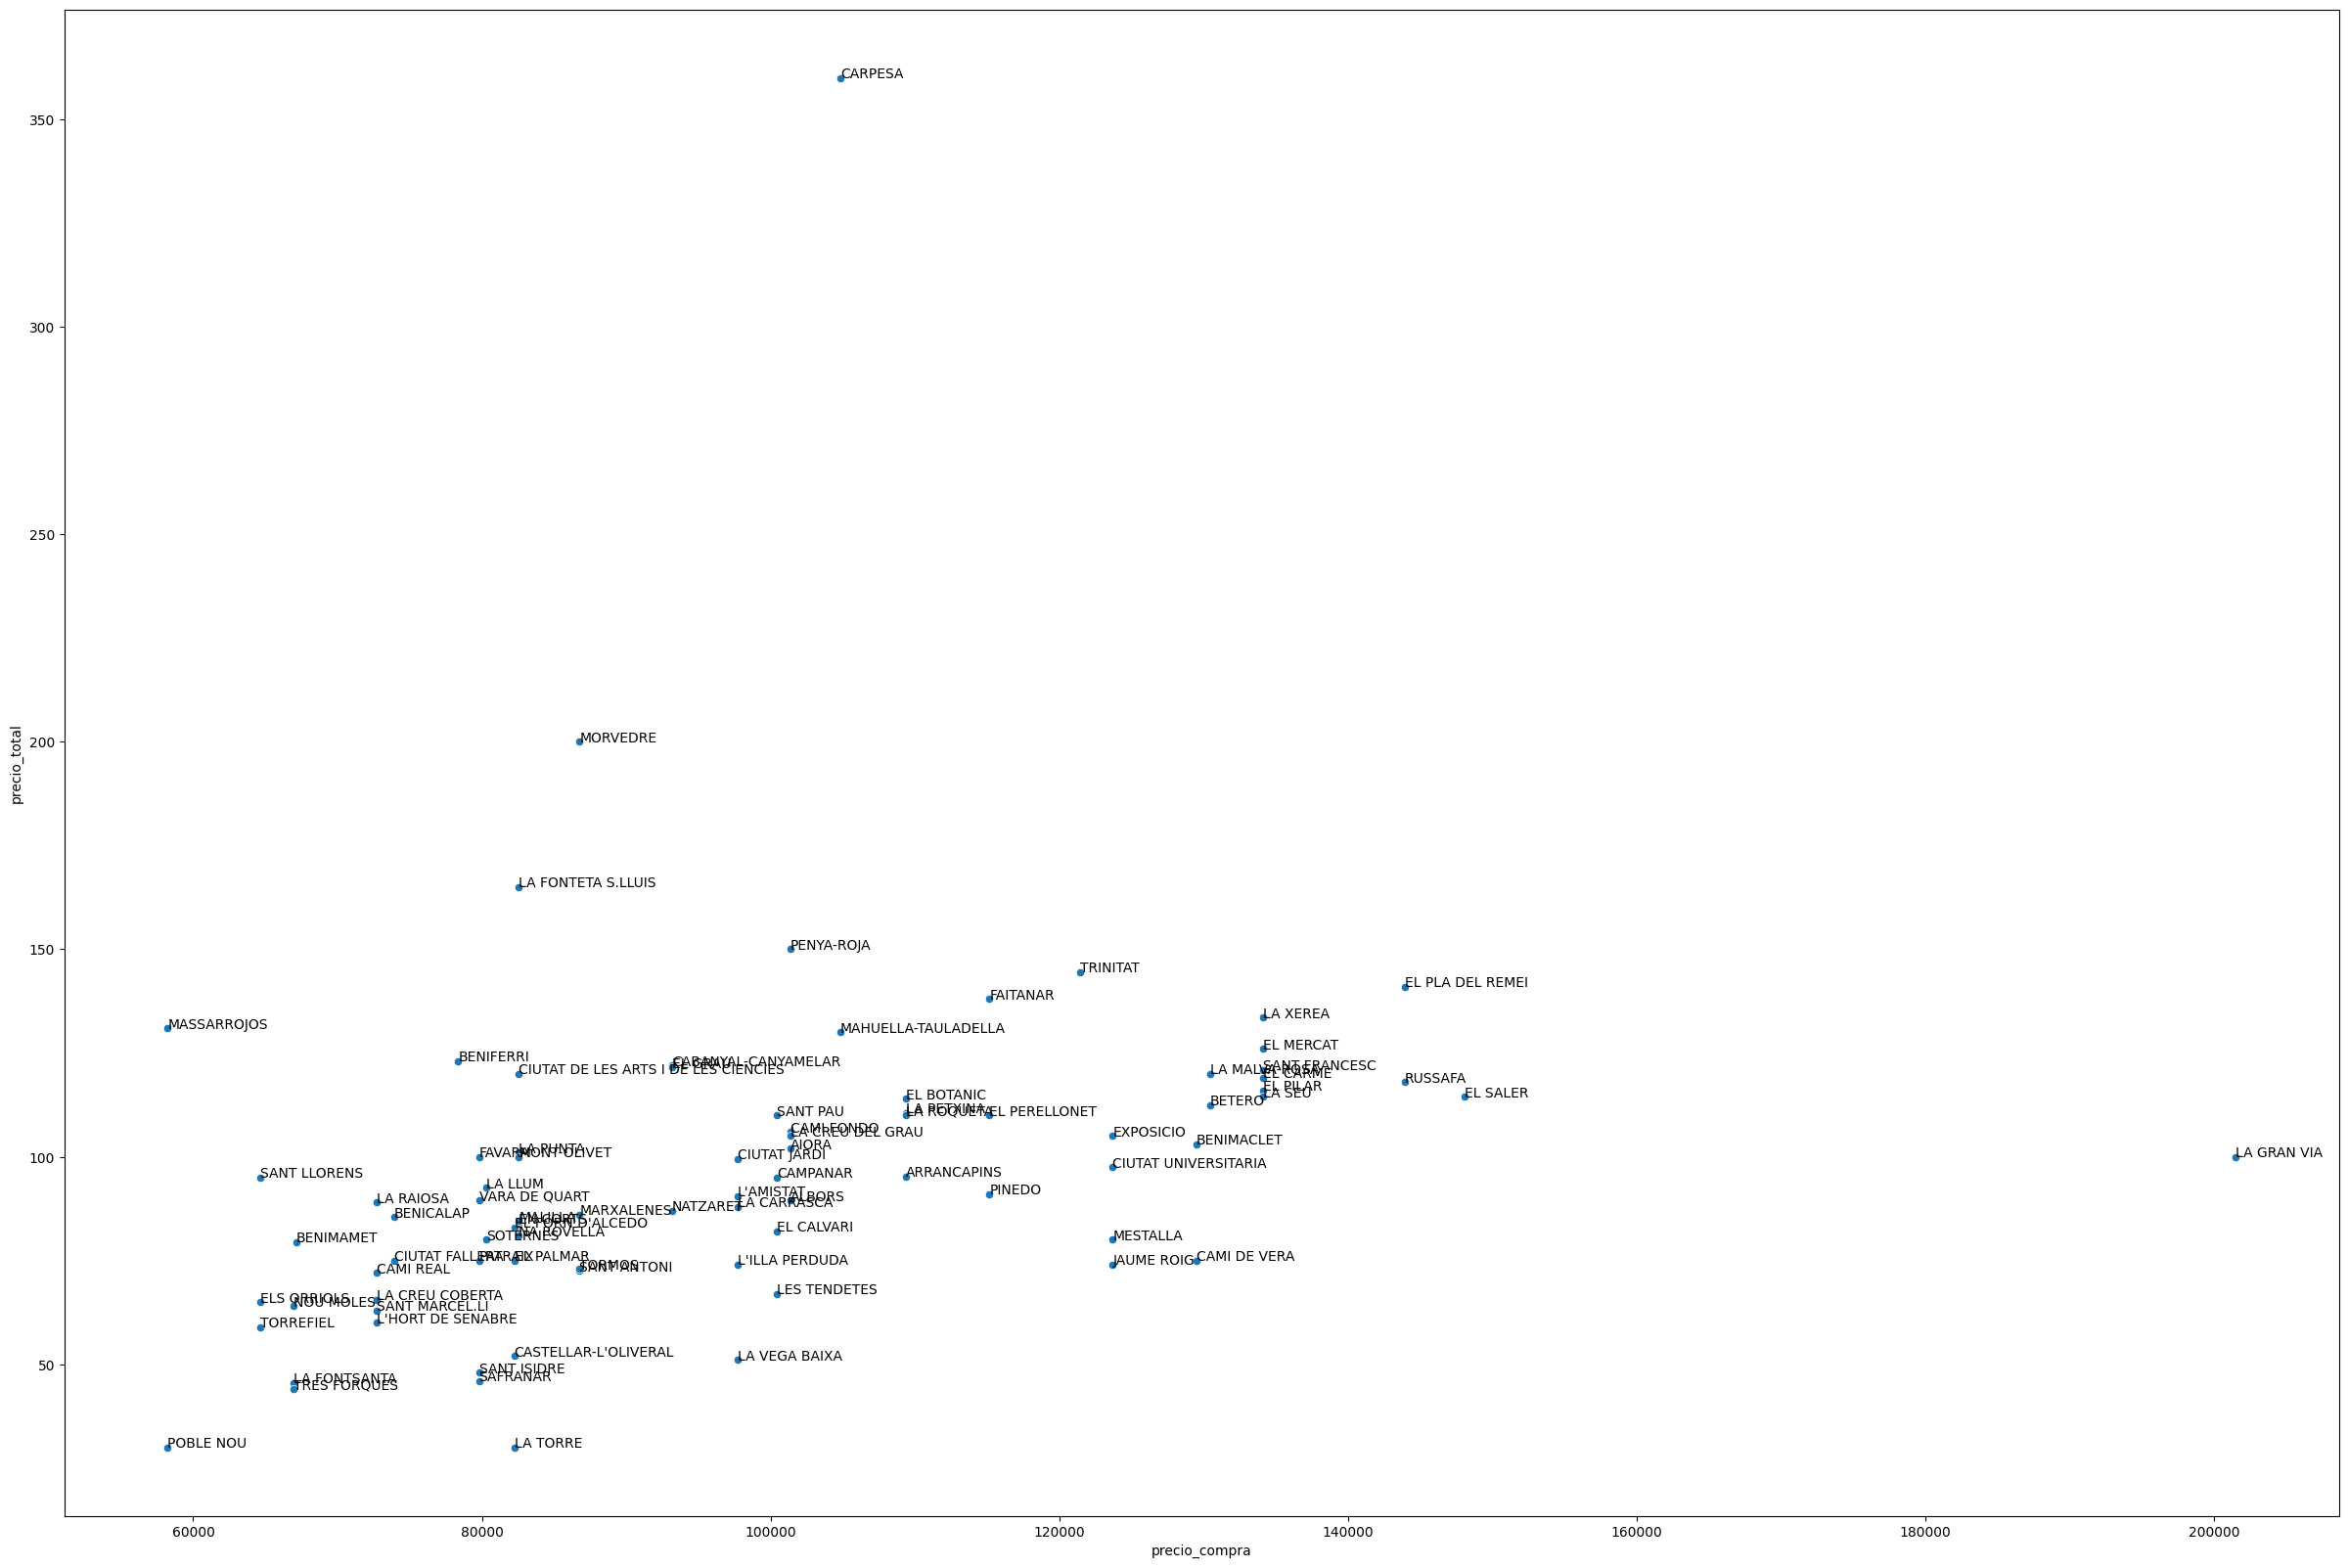

In [19]:
plt.figure(figsize = (30,20))
sns.scatterplot(data = tempBarrio, x='precio_compra', y = 'precio_total')

for cada in range(0,tempBarrio.shape[0]):
    plt.text(tempBarrio.precio_compra.iloc[cada], tempBarrio.precio_total.iloc[cada], tempBarrio.index[cada])

;


From here we can get insights, we can identify (excluding the atypical ones from the periphery that many people see, which is also an option) for each category (low-medium-high) some neighborhoods that offer better profitability. This is insight because it is what they asked us when they asked us to do this analysis.

### Other factors affecting the price

In [20]:
df.filter(like = "disc")

bedrooms_disc accommodates_disc beds_disc number_of_reviews_disc
0              02_Dos               3-4       2-3                   2-37
1              01_Uno               3-4       2-3                   2-37
2     04_Cuatro_o_mas              5-16      4-31                 38-860
3              01_Uno              5-16       0-1                    0-1
4              02_Dos              5-16      4-31                 38-860
...               ...               ...       ...                    ...
8997           01_Uno               1-2       0-1                    0-1
8998           01_Uno               1-2       0-1                    0-1
8999           01_Uno               1-2       0-1                    0-1
9000  04_Cuatro_o_mas              5-16      4-31                 38-860
9001           01_Uno               3-4       2-3                   2-37

[9002 rows x 4 columns]

In [3]:
# let's use this as an excuse to practice making a minicube.
# the minicube is more useful when instead of 3 we have 30 variables

In [22]:

metricas = ['precio_total', 'precio_compra']

dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc']

minicubo_precio = df[dimensiones + metricas]

minicubo_precio



bedrooms_disc accommodates_disc beds_disc  precio_total  precio_compra
0              02_Dos               3-4       2-3          92.0       121471.0
1              01_Uno               3-4       2-3          75.0       134120.0
2     04_Cuatro_o_mas              5-16      4-31         269.0       298144.0
3              01_Uno              5-16       0-1         132.0       109375.0
4              02_Dos              5-16      4-31         180.0       141904.0
...               ...               ...       ...           ...            ...
8997           01_Uno               1-2       0-1          90.0        64680.0
8998           01_Uno               1-2       0-1          39.0       101360.0
8999           01_Uno               1-2       0-1          57.0        64680.0
9000  04_Cuatro_o_mas              5-16      4-31         400.0       321888.0
9001           01_Uno               3-4       2-3          70.0       134120.0

[9002 rows x 5 columns]

In [23]:

minicubo_precio_transaccional = minicubo_precio.melt(id_vars = metricas)
minicubo_precio_transaccional


precio_total  precio_compra       variable            value
0              92.0       121471.0  bedrooms_disc           02_Dos
1              75.0       134120.0  bedrooms_disc           01_Uno
2             269.0       298144.0  bedrooms_disc  04_Cuatro_o_mas
3             132.0       109375.0  bedrooms_disc           01_Uno
4             180.0       141904.0  bedrooms_disc           02_Dos
...             ...            ...            ...              ...
27001          90.0        64680.0      beds_disc              0-1
27002          39.0       101360.0      beds_disc              0-1
27003          57.0        64680.0      beds_disc              0-1
27004         400.0       321888.0      beds_disc             4-31
27005          70.0       134120.0      beds_disc              2-3

[27006 rows x 4 columns]

In [24]:

minicubo = minicubo_precio_transaccional.groupby(['variable', 'value'])\
            [metricas].agg('median')

minicubo



precio_total  precio_compra
variable          value                                       
accommodates_disc 1-2                      59.0        97720.0
                  3-4                     116.0       130438.0
                  5-16                    150.0       167706.0
bedrooms_disc     01_Uno                   83.0        93170.0
                  02_Dos                  127.0       140630.0
                  03_Tres                 141.0       167706.0
                  04_Cuatro_o_mas         170.0       243264.0
beds_disc         0-1                      69.0       101360.0
                  2-3                     121.0       130438.0
                  4-31                    151.5       180810.0

### Exploiting the minicube


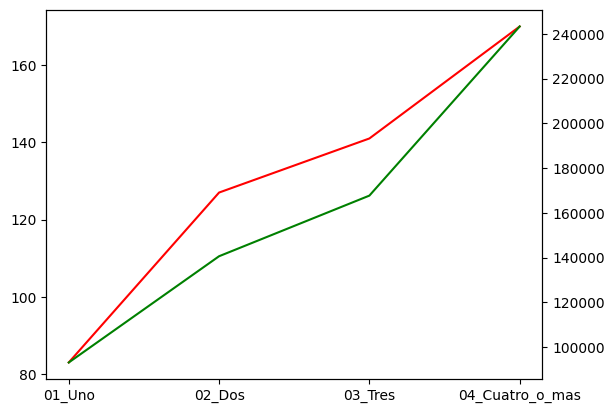

In [26]:


f, ax = plt.subplots()

ax.plot(minicubo.loc['bedrooms_disc'].precio_total, color = 'red')

ax2 = ax.twinx()
ax2.plot(minicubo.loc['bedrooms_disc'].precio_compra, color = 'green')

# they are related, in fact we use it as a proxy
# the fact that this relationship appears confirms that they were related
# (num rooms with price and such)

# they overlap for him, but not for me, it would be necessary to think about this a bit
# or well, what does it matter

# of course, something is going on here.
# I'll leave thinking about it for another day


In [27]:
minicubo.loc['beds_disc']

precio_total  precio_compra
value                             
0-1            69.0       101360.0
2-3           121.0       130438.0
4-31          151.5       180810.0

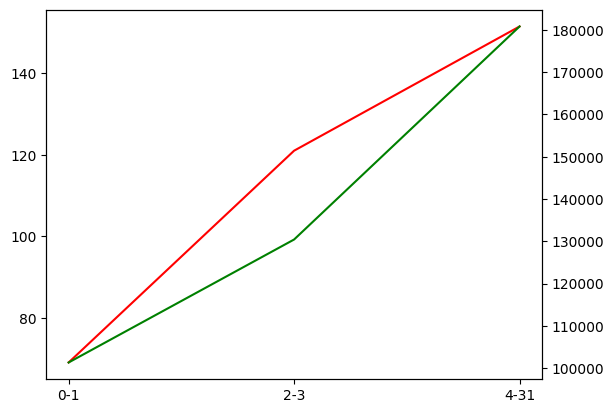

In [28]:
f, ax = plt.subplots()

ax.plot(minicubo.loc['beds_disc'].precio_total, color = 'red')

ax2 = ax.twinx()
ax2.plot(minicubo.loc['beds_disc'].precio_compra, color = 'green')


The rental price peaks at 2-3, while the price drops at 2-3.
In Madrid, this is the other way around.

It also happens that I have not distinguished between 2 or 3


<Axes: xlabel='beds'>

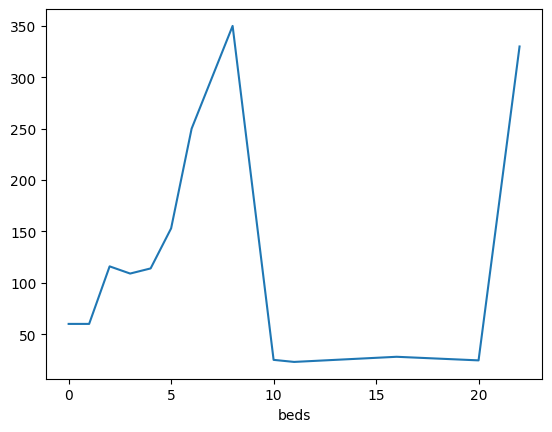

In [29]:
df[df.bedrooms == 1].groupby('beds').precio_total.median().plot()

Well, we can ignore the weird thing starting at 9-10.
Before that it increases linearly, which makes sense.

There's some thread to pull on here, **it seems people are putting in a lot of beds**

#### Number of people you can fit

In [30]:
minicubo.loc['accommodates_disc']

precio_total  precio_compra
value                             
1-2            59.0        97720.0
3-4           116.0       130438.0
5-16          150.0       167706.0

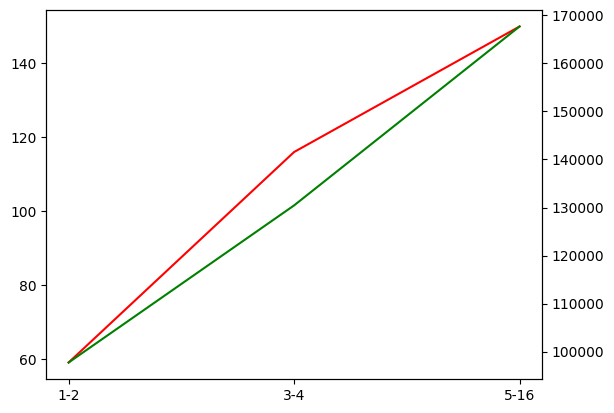

In [31]:
f, ax = plt.subplots()

ax.plot(minicubo.loc['accommodates_disc'].precio_total, color = 'red')

ax2 = ax.twinx()
ax2.plot(minicubo.loc['accommodates_disc'].precio_compra, color = 'green')


It seems that 3-4 is where there is the best profitability. Perhaps it would be useful and not take much time to not discretize directly, and see if the pattern continues to be fulfilled.

It is not even that there is an advantage, I think that from here we can only extract that clearly the benefit of going from 1-2 to 3-4 is greater than that of going from 3-4 to the next

### Impact of proximity to the point of interest



The best thing would have been to build more of these, in a real case. Here, the truth is that I don't think that the proximity to arts i ciencies will have much of an effect.

In [35]:
df.groupby('distrito').pdi_arts.median().sort_values()

distrito
CAMINS AL GRAU        1.315031
QUATRE CARRERES       1.499591
ALGIROS               2.065601
L'EIXAMPLE            2.175139
EL PLA DEL REAL       2.218498
POBLATS MARITIMS      2.325160
JESUS                 3.263910
CIUTAT VELLA          3.270603
EXTRAMURS             3.431971
BENIMACLET            3.567955
PATRAIX               3.729017
LA SAIDIA             4.001610
L'OLIVERETA           4.566739
CAMPANAR              4.791867
RASCANYA              4.793056
BENICALAP             5.619823
POBLATS DEL NORD      6.777909
POBLATS DE L'OEST     7.852815
POBLATS DEL SUD      14.906613
Name: pdi_arts, dtype: float64

In [36]:
# we're going to catch up to El pla del real

seleccion = df.groupby('distrito').pdi_arts.median().sort_values()[0:7].index.to_list()
seleccion



['CAMINS AL GRAU',
 'QUATRE CARRERES',
 'ALGIROS',
 "L'EIXAMPLE",
 'EL PLA DEL REAL',
 'POBLATS MARITIMS',
 'JESUS']

<Axes: xlabel='pdi_arts', ylabel='precio_total'>

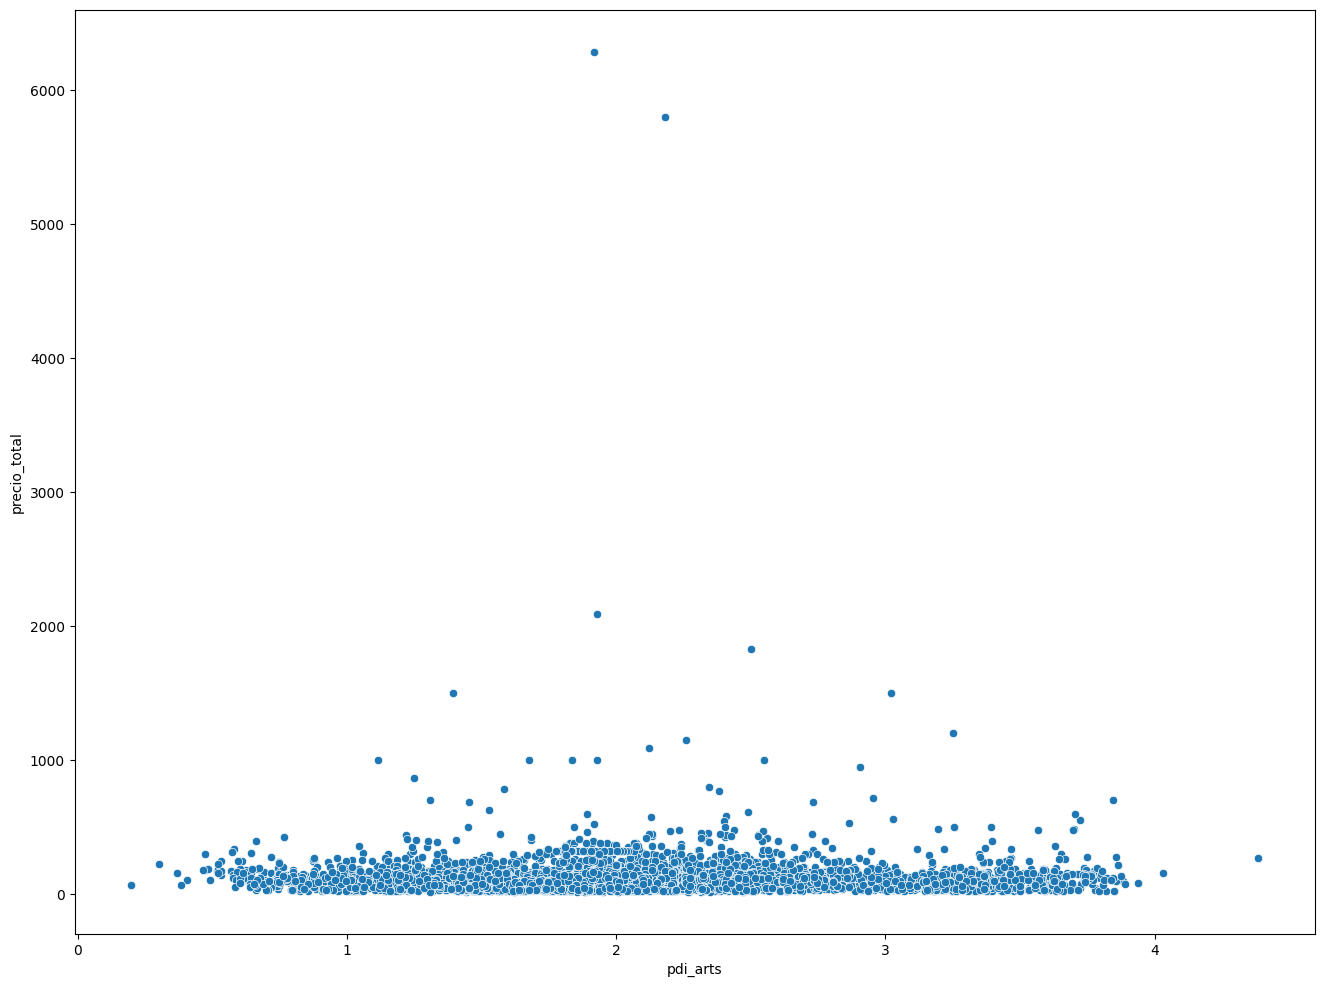

In [38]:

plt.figure(figsize = (16,12))
sns.scatterplot(
    data = df.loc[df.distrito.isin(seleccion)], 
    x = "pdi_arts", 
    y = "precio_total")



It seems that there is not much of a relationship between distance and price. At most, you can see that there is a higher price at 2km, which must coincide with the city centre or something like that.

Again, this is an example, there are probably more factors that should be analysed and other points of interest.

In [4]:
# we are going to do a map thing, for this we install folium

# conda install -c conda-forge folium

In [40]:
import folium

In [51]:
folium.Map(location=[39.483750, -0.375020], zoom_start=12)

In [88]:
datos = df[df.distrito == 'POBLATS MARITIMS'].copy()

In [89]:
mapa = folium.Map(location=[39.483750, -0.375020],zoom_start=12)

for piso in range(0,len(datos)):
   folium.Marker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['precio_total'],
   ).add_to(mapa)

mapa

In [90]:

datos['precio_total_disc'] = pd.qcut(datos['precio_total'], q = [0, .25, .5, .75, 1.], 
                              labels=['lime', 'yellow', 'orange', 'red'])


In [91]:

mapa = folium.Map(location=[39.483750, -0.375020],zoom_start=12)

for piso in range(0,len(datos)):
   folium.CircleMarker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['precio_total'],
      fill=True,
      color = datos.iloc[piso]['precio_total_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

mapa
